# Analyze a move sequence that looks like a blunder

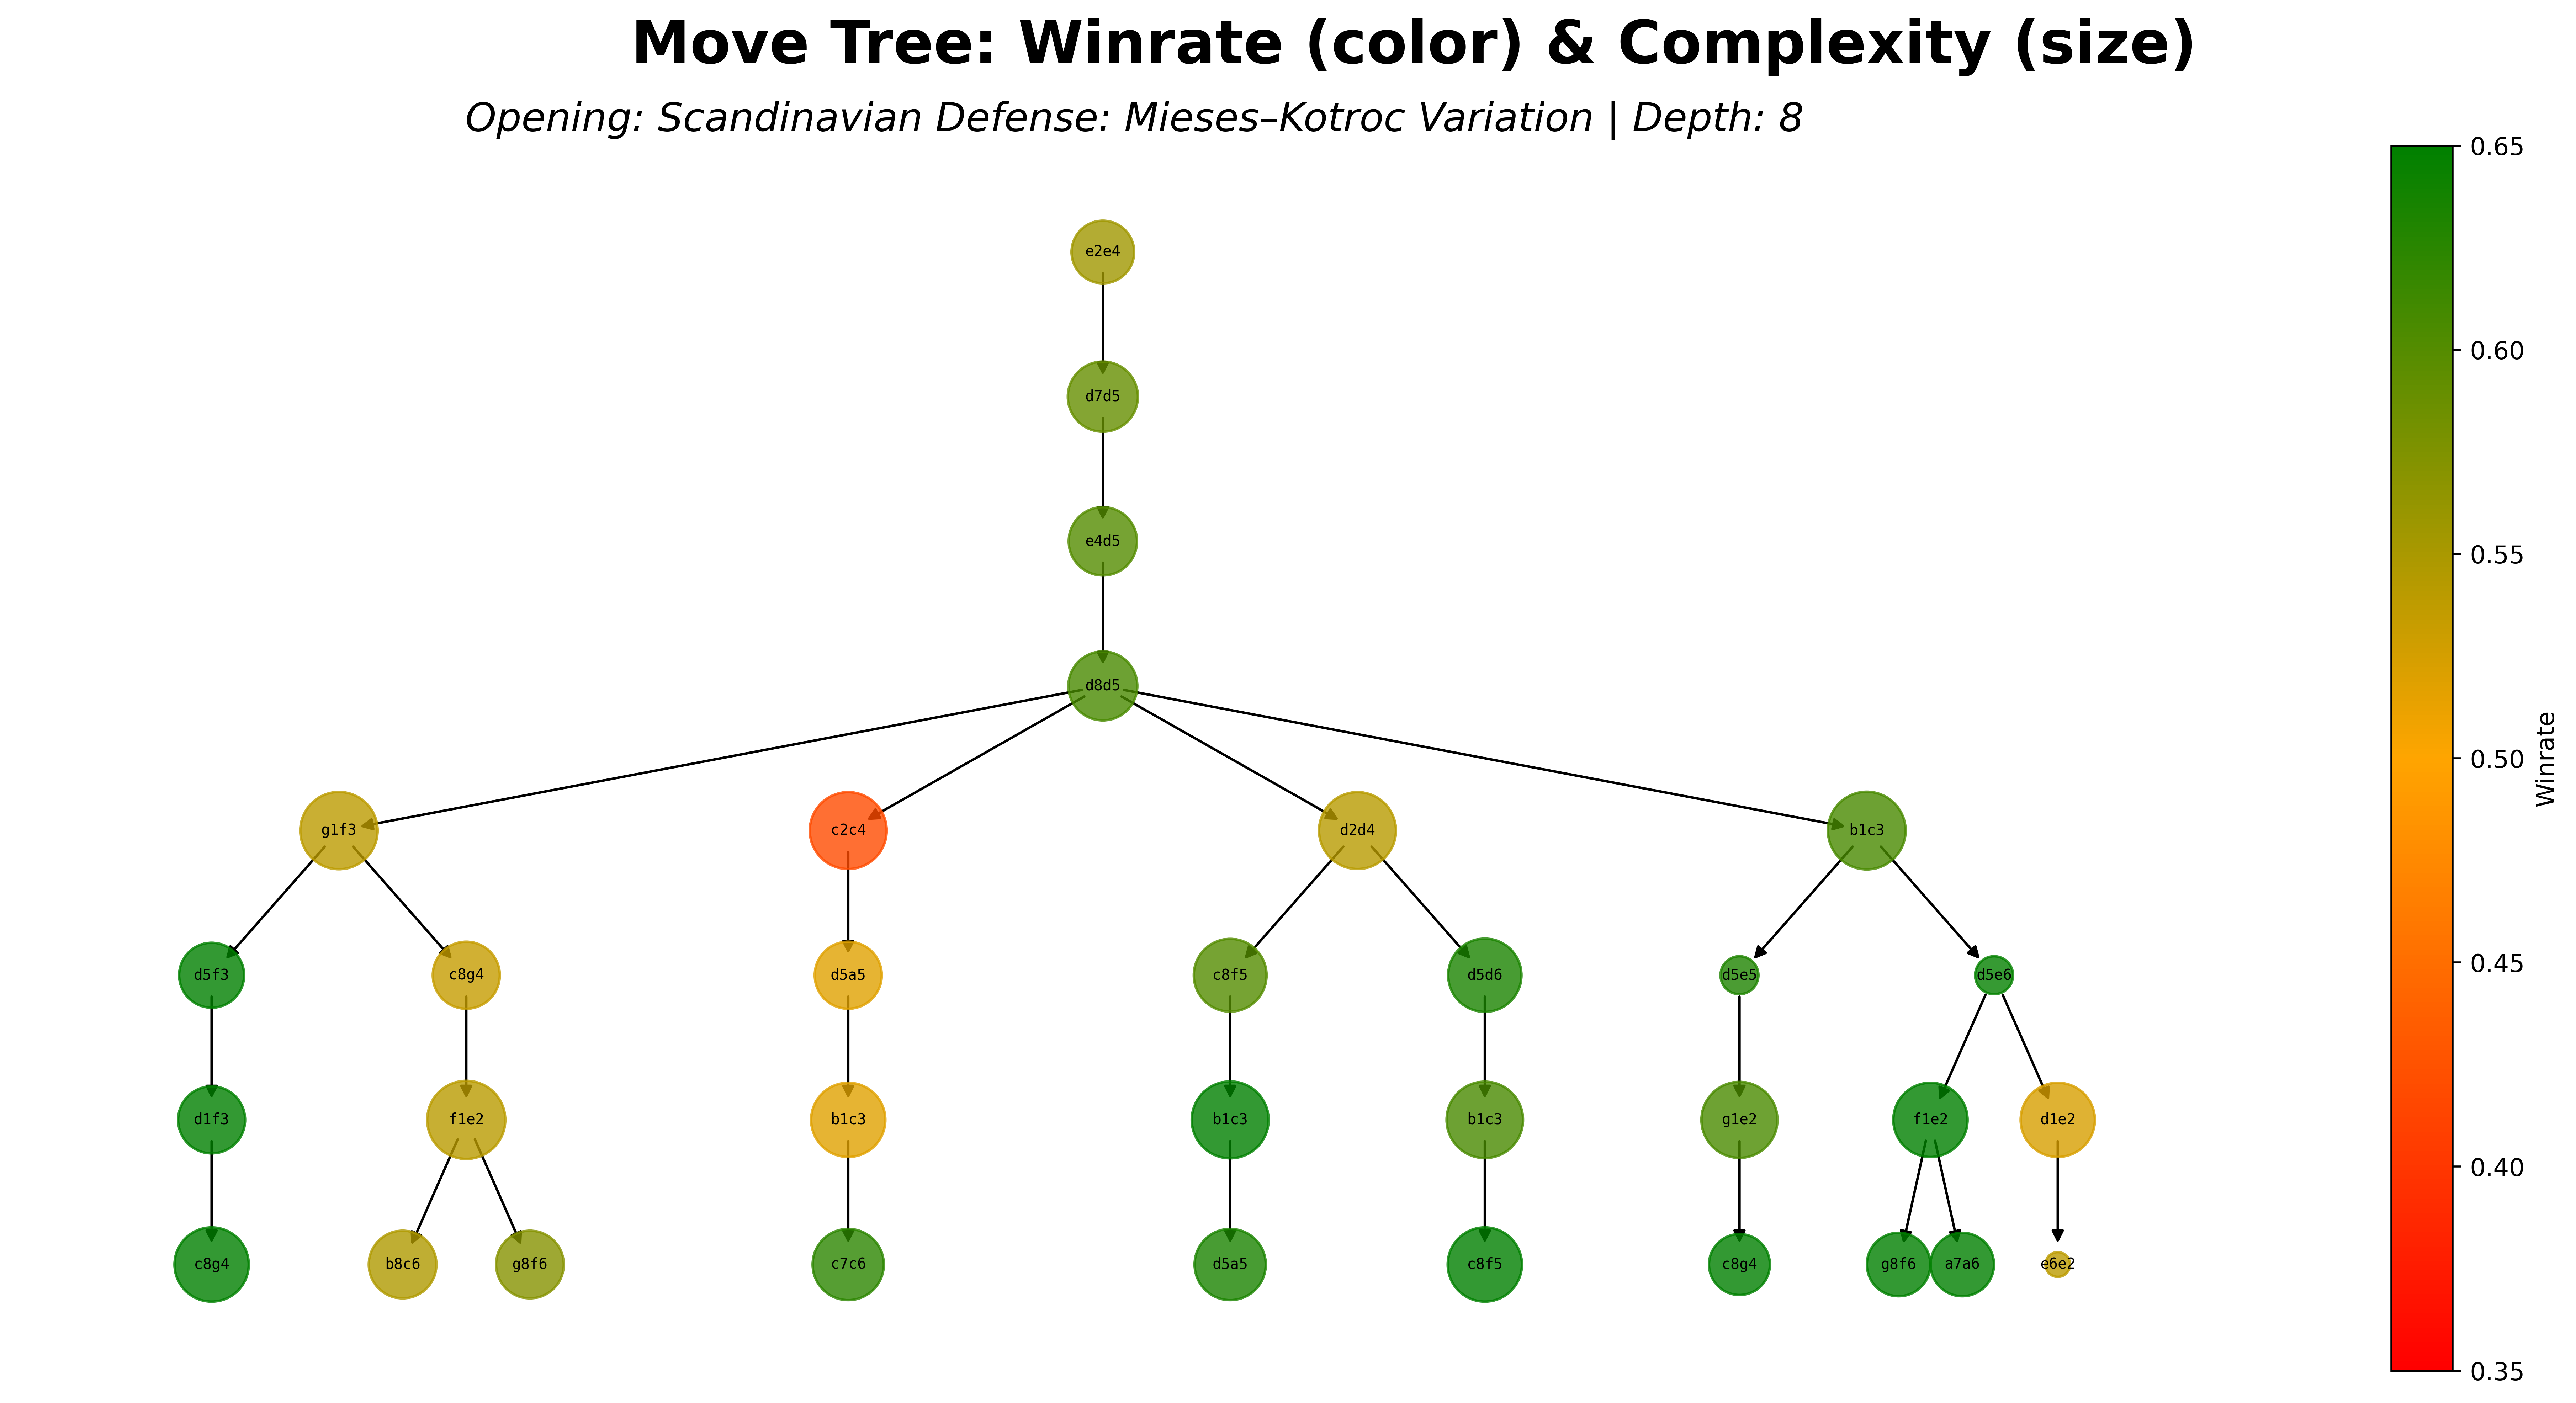

In [93]:
from IPython.display import Image, display

display(Image(filename="images/move_tree_20250427_160410.png"))

In [94]:
import pandas as pd

df = pd.read_parquet('../data/moves_2025_01.parquet')
df.tail()

,moves,winner
60851,e2e4 d7d5 e4d5 d8d5 b1c3 d5e6 f1e2 b8c6 g1f3 g...,1
60852,e2e4 d7d5 e4d5 d8d5 d2d4 g8f6 c1e3 c8g4 f1e2 b...,1
60853,e2e4 d7d5 e4d5 d8d5 d2d3 d5d4 c2c3 d4e5 f1e2 c...,2
60854,e2e4 d7d5 e4d5 d8d5 d2d4 g8f6 b1c3 g7g6 c3d5 f...,1
60855,e2e4 d7d5 e4d5 d8d5 g1f3 c8g4 f1e2 b8c6 e1g1 e...,1


In [95]:
df_pruned = df.copy()
df_pruned["m5"] = df["moves"].str.split().str[4]

result = (
    df_pruned.groupby('m5')
    .agg(count=('winner', 'size'),
         winrate=('winner', lambda x: (x == 1).sum() / x.count()))
    .sort_values('count', ascending=False)
    .reset_index()
)

result.head()

,m5,count,winrate
0,b1c3,24340,0.515448
1,g1f3,17837,0.493637
2,d2d4,9850,0.494721
3,c2c4,3815,0.486239
4,d1f3,1910,0.494764


In [96]:
result[result["m5"] == "c2c4"]

,m5,count,winrate
3,c2c4,3815,0.486239


#### Result: Hätte man sich sparen können, anscheinend kein Blunder, sondern nur schlechte Winrate auf den ersten 10 Samples

## Visualize

In [97]:
def board_after_n_moves(moves_str, n_moves=5):
    board = chess.Board()
    for uci in moves_str.split()[:n_moves]:
        board.push_uci(uci)
    return board

Best 5th move:  b1c3   (Winrate: 0.515)


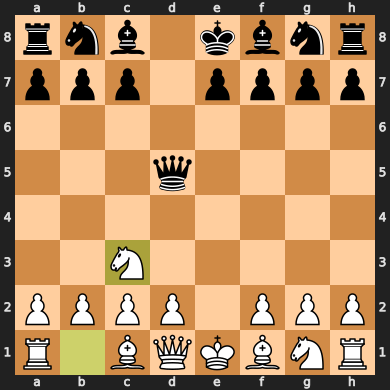

Worst 5th move: g1e2  (Winrate: 0.491)


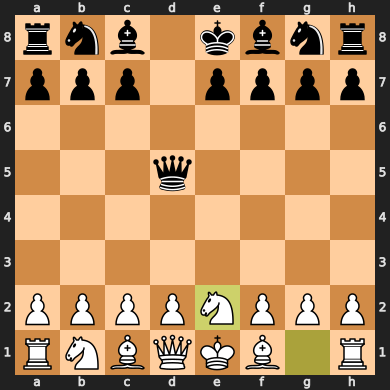

In [98]:
import chess

stats = result[result["count"] > 100]
best_move = stats.iloc[0]["m5"]
worst_move = stats.iloc[-1]["m5"]

row_worst = df[df["moves"].str.split().str[4] == worst_move].iloc[0]
row_best = df[df["moves"].str.split().str[4] == best_move].iloc[0]

board_best = board_after_n_moves(row_best["moves"])
print(f"Best 5th move:  {best_move}   (Winrate: {stats.iloc[0]['winrate']:.3f})")
display(board_best)

board_worst = board_after_n_moves(row_worst["moves"])
print(f"Worst 5th move: {worst_move}  (Winrate: {stats.iloc[-1]['winrate']:.3f})")
display(board_worst)